# Training of Perceptron

In [1]:
#creating a classification dataset

from sklearn.datasets import make_classification
import numpy as np

x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
import matplotlib.pyplot as plt

In [5]:
print(x.shape,"\n")
print(x)

(100, 2) 

[[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]
 [-0.83241122  0.15599044]
 [-1.79207014  1.07782053]
 [ 0.0856607   0.80626713]
 [-0.55865299  0.74859527]
 [-1.95974262  0.75152794]
 [-1.77828947 -0.90114581]
 [-1.77985853 -0.1815243 ]
 [-0.02194151 -2.98092432]
 [ 0.80563431  1.20500136]
 [-1.82701214  0.78302407]
 [ 0.38730728  0.42968688]
 [-0.14108668 -0.73229726]
 [-1.87955941 -0.83930476]
 [-0.18232911  0.83727062]
 [-1.77059533 -0.10255323]
 [-2.27658028  0.65867001]
 [-2.06519502  0.92649819]
 [-1.31690551  0.10216193]
 [ 1.61043259  0.46886454]
 [-1.21650394  0.45432938]
 [ 0.6139723   1.8613386 ]
 [-1.78760957 -0.79255991]
 [-1.04149161 -1.0004391 ]
 [-2.40067584 -0.53814137]
 [-1.80383452  0.44027716]
 [-1.44075613  0.27047889]
 [ 1.34989978 -0.75869267]
 [ 0.22520167  0.6802322 ]
 [ 0.53688527  0.17018845]
 [ 0.55483459 -1.01121977]
 [-0.32178185 -0.8394709 ]
 [-0.98821248  0.

In [6]:
print(y.shape,"\n")
print(y)

(100,) 

[1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1]


In [14]:
x[0]

array([ 0.19924745, -0.11697552])

<AxesSubplot: >

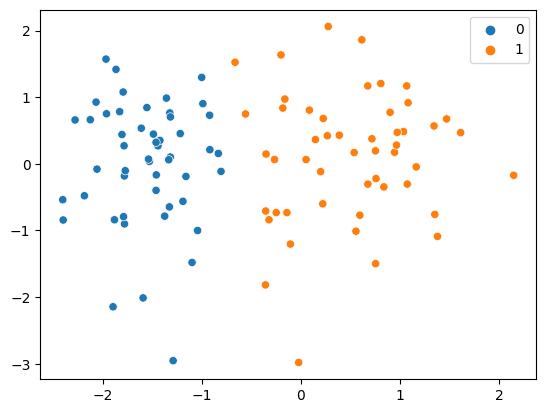

In [16]:
import seaborn as sns
sns.scatterplot(x= x[:,0],y=x[:,1], hue=y)

# Perceptron Trick Algo:

- iterate the loop till epochs value times
- in each iteration pick a random datapoint and see if the line created correctly classifies the point (if not then transfer the 
  line in such a way that the picked point is correctly classified)

In [17]:
np.insert(x,0,1,axis=1)

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

In [18]:
x.shape

(100, 2)

In [30]:
def perceptron(x,y):
    x = np.insert(x,0,1,axis=1) # insert 1 at 0th position in x - this will crreate a new column with all values 1(for intercept)
    weights = np.ones(x.shape[1]) # creates an array weight of 1*3 (here) -> A,B,c in Ax+By+c=-0
    lr=0.1 #learning rate
    for i in range(1000):
        j = np.random.randint(0,100) # to pick up jth record from the data
        pred = (np.dot(x[j],weights)) # prediction of picked datapoint through the line created
        y_hat = step(pred) # if pred>=0 then it is 1 or else 0
        weights = weights + lr*(y[j]-y_hat)*x[j] # update weight value accordingly -> new values of coefficients of line
    return weights[0], weights[1:]  # intercept, coefficients

In [31]:
def step(z):
    return 1 if z>=0 else 0

In [32]:
intercept_,coef_ = perceptron(x,y)
print(coef_)
print(intercept_)

[1.35168312 0.13690398]
0.8


In [33]:
m = -(coef_[0]/coef_[1]) # slope
b = -(intercept_/coef_[1]) #intercept

In [34]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

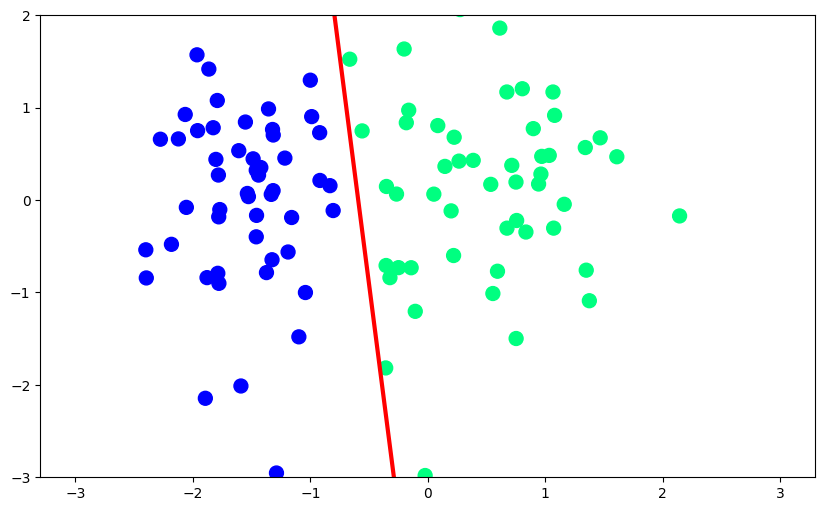

In [38]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)